# Used Cars Dataset

- 데이터 셋 : https://www.kaggle.com/austinreese/craigslist-carstrucks-data

- 중고차가 가진 여러가지 변수를 통해 중고차의 가격을 예측하고자 하는 데이터 셋이다.

## 라이브러리 설정 및 데이터 읽어들이기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('vehicles.csv')

pd.set_option('display.max_columns', None)

In [2]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

## EDA 및 기초 통계 분석

In [5]:
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


- 가격/ 평균값이 4만달러, 중위값이 천만달러 
- 가격 /최소값이 0, 최대값이 터무니없이 높음(잘못설정된것(아웃라이어))
- 주행거리 역시 잘못된 데이터가 있음.

### 불필요한 column 제거
- year를 연식(age)값으로 바꿈.

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'VIN',
         'image_url', 'description', 'state', 'lat', 'long',
         'posting_date'], axis=1, inplace=True)

In [9]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

### 범주형 데이터 분석

In [10]:
len(df['manufacturer'].value_counts())

43

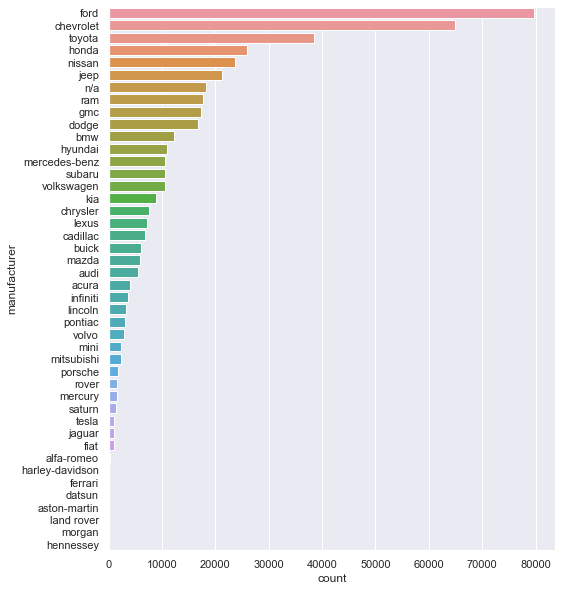

In [14]:
plt.figure(figsize=(8,10))
sns.countplot(data=df.fillna('n/a'), y='manufacturer', order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [15]:
len(df['model'].value_counts())

# for model, num in zip(df['model'].value_counts().index df['model'].value_counts()):
# print(model, num)

31520

In [16]:
len(df['condition'].value_counts())

6

In [19]:
len(df['cylinders'].value_counts())

8

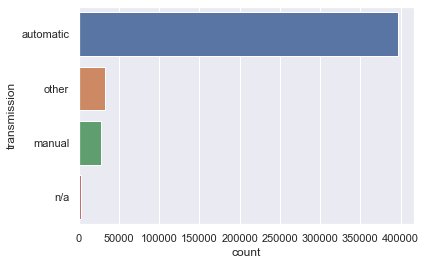

In [21]:
sns.countplot(data=df.fillna('n/a'), y='transmission', order=df.fillna('n/a')['transmission'].value_counts().index)

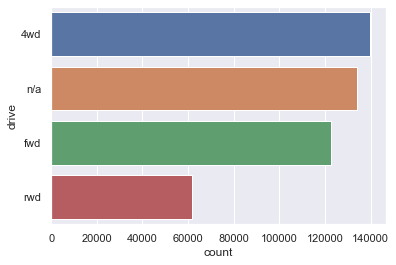

In [22]:
sns.countplot(data=df.fillna('n/a'), y='drive', order=df.fillna('n/a')['drive'].value_counts().index)

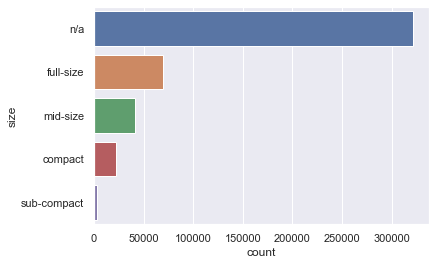

In [23]:
sns.countplot(data=df.fillna('n/a'), y='size', order=df.fillna('n/a')['size'].value_counts().index)

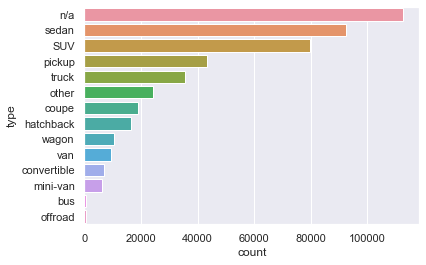

In [24]:
sns.countplot(data=df.fillna('n/a'), y='type', order=df.fillna('n/a')['type'].value_counts().index)

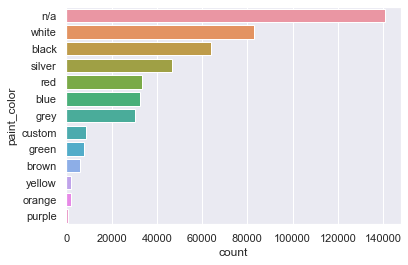

In [25]:
sns.countplot(data=df.fillna('n/a'), y='paint_color', order=df.fillna('n/a')['paint_color'].value_counts().index)

### 수치형 데이터 분석

In [26]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

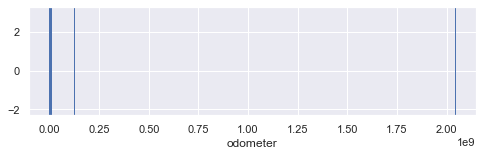

In [27]:
plt.figure(figsize=(8,2))
sns.rugplot(data=df, x='odometer', height=1)

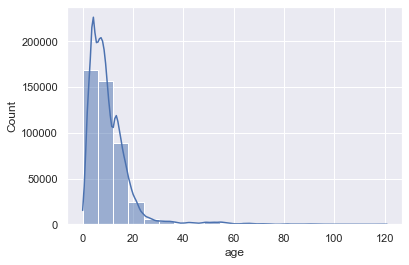

In [29]:
sns.histplot(data=df, x='age', bins=20, kde=True)

## 데이터 전처리

#### 범주형 데이터 전처리

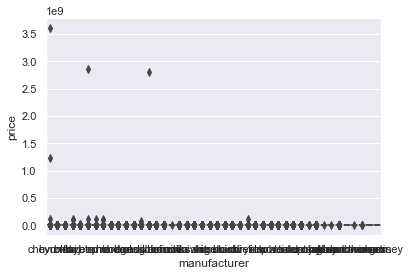

In [30]:
sns.boxplot(data=df.fillna('n/a'), x='manufacturer', y='price')

- 아웃라이어가 심각

In [31]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

- 해당 Columns 들이 어느정도까지가 유의미한 데이터인지 확인하기 위해 plot를 그림.

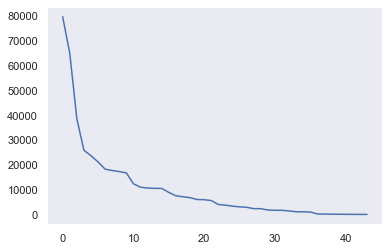

In [34]:
col= 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

# 10 정도가 적당해보임.

In [35]:
# 상위 10개에 포함되지 않는 분류의 경우 others로 취급
n_categorical = 10 
counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')

In [36]:
df['manufacturer'].value_counts()

others       134392
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
Name: manufacturer, dtype: int64

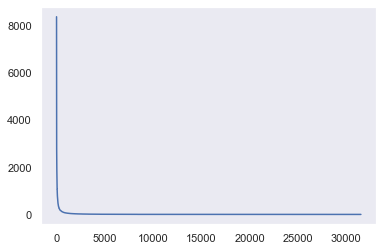

In [37]:
col= 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

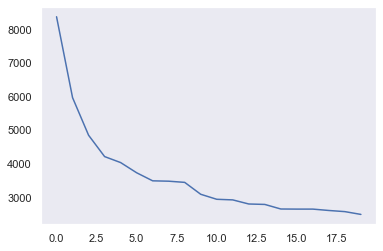

In [38]:
col= 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts[:20])), counts[:20])

In [39]:
# manufacturer 와 달리 분류가 엄청 많아서 lambda 실행으로 느리게 작동할 수 있음.
n_categorical = 10 
#counts.index[n_categorical:]
# df[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

df['model'].value_counts()

others            413556
f-150               8370
silverado 1500      5964
1500                4211
camry               4033
accord              3730
altima              3490
civic               3479
escape              3444
silverado           3090
Name: model, dtype: int64

In [42]:
col = 'condition'
counts = df[col].fillna('others').value_counts()
n_categorical = 3 
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [43]:
col = 'cylinders'
counts = df[col].fillna('others').value_counts()
n_categorical = 4 
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [44]:
col = 'fuel'
# counts = df[col].fillna('others').value_counts()
# counts.index

n_categorical = 2
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [45]:
df.drop('title_status', axis=1, inplace=True)

In [46]:
col = 'transmission'
counts = df[col].fillna('others').value_counts()
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [47]:
col = 'drive'
df[col].fillna('others', inplace=True)

In [48]:
col = 'size'
counts = df[col].fillna('others').value_counts()
n_categorical = 2
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

In [49]:
col = 'type'
counts = df[col].fillna('others').value_counts()
n_categorical = 8
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

df.loc[df[col] == 'other', col] = 'others'

# other이란 분류도 있어서 others에 편입.

In [51]:
col = 'paint_color'
counts = df[col].fillna('others').value_counts()
n_categorical = 7
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')

#### 수치형 데이터 전처리

In [52]:
# age는 양호, odometer와 price 조정 필요.
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.1)
print(p1, p2)

# 가격 = 상위 1% , 하위 10%를 제거하여 아웃라이어 제거.

59900.0 651.0


In [54]:
df = df[(p1 > df['price']) & (df['price'] > p2)]

In [53]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

# 주행거리 = 상위, 하위 1% 제거하여 아웃라이어 제거.

270000.0 17553.0


In [55]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

In [56]:
df.describe()

# 아웃라이어 제거 하여 수치형 데이터 개괄

,price,odometer,age
count,324382.000000,324382.000000,323860.000000
mean,15314.530106,102569.319602,10.174001
std,11298.917484,55165.135400,7.076283
min,652.000000,17555.000000,0.000000
25%,6500.000000,56199.000000,5.000000
50%,12388.000000,98146.000000,9.000000
75%,21000.000000,140482.750000,13.000000
max,59895.000000,269930.000000,121.000000


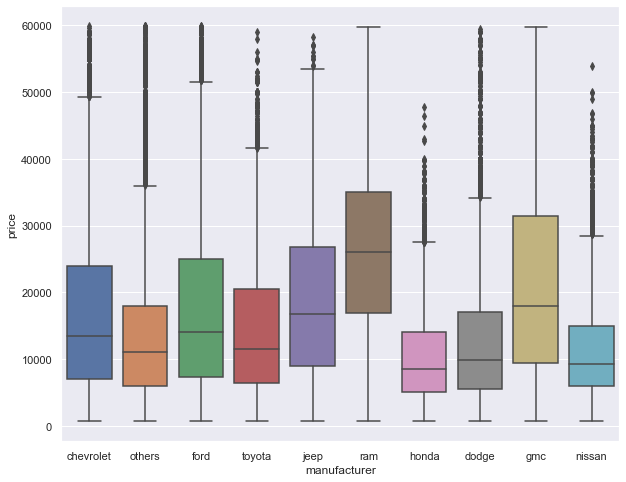

In [58]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='manufacturer', y='price')

- 전체적인 범위가 다르지 않지만 평균 값들을 비교할 만하다.

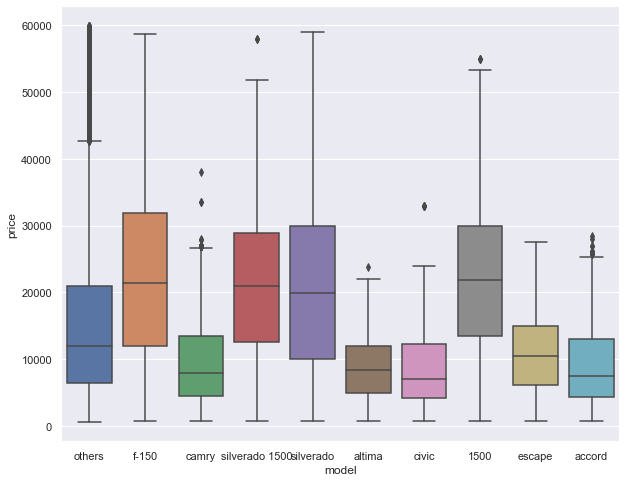

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='model', y='price')

- 같은 모델이라도 상태, 주행거리에 따라 가격이 크게 달라짐. 물론 모델마다 다르기도함.

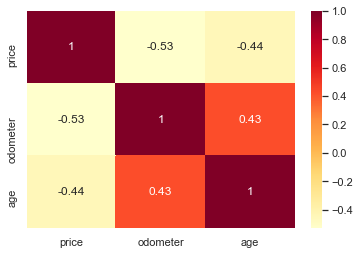

In [62]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

- 상관성은 높으나 주행거리, 연식 둘다 가격에 역방향으로 영향을 줌.
- 주행거리와 연식도 당연하게도 영향이 있음.
- 두개 모두 사용하면 비효율적인 모델이 될 수 있음.

In [63]:
from sklearn.preprocessing import StandardScaler

X_num = df[['odometer', 'age']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

# 범주형 데이터 one-hot 벡터로
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)
X_cat = pd.get_dummies(X_cat)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [64]:
X.head()

,odometer,age,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,region_annapolis,region_appleton-oshkosh-FDL,region_asheville,region_ashtabula,region_athens,region_atlanta,region_auburn,region_augusta,region_austin,region_bakersfield,region_baltimore,region_baton rouge,region_battle creek,region_beaumont / port arthur,region_bellingham,region_bemidji,region_bend,region_billings,region_binghamton,region_birmingham,region_bismarck,region_bloomington,region_bloomington-normal,region_boise,region_boone,region_boston,region_boulder,region_bowling green,region_bozeman,region_brainerd,region_brownsville,region_brunswick,region_buffalo,region_butte,region_cape cod / islands,region_catskills,region_cedar rapids,region_central NJ,region_central louisiana,region_central michigan,region_champaign urbana,region_charleston,region_charlotte,region_charlottesville,region_chattanooga,region_chautauqua,region_chicago,region_chico,region_chillicothe,region_cincinnati,region_clarksville,region_cleveland,region_clovis / portales,region_college station,region_colorado springs,region_columbia,region_columbia / jeff city,region_columbus,region_cookeville,region_corpus christi,region_corvallis/albany,region_cumberland valley,region_dallas / fort worth,region_danville,region_dayton / springfield,region_daytona beach,region_decatur,region_deep east texas,region_del rio / eagle pass,region_delaware,region_denver,region_des moines,region_detroit metro,region_dothan,region_dubuque,region_duluth / superior,region_east idaho,region_east oregon,region_eastern CO,region_eastern CT,region_eastern NC,region_eastern kentucky,region_eastern montana,region_eastern panhandle,region_eastern shore,region_eau claire,region_el paso,region_elko,region_elmira-corning,region_erie,region_eugene,region_evansville,region_fairbanks,region_fargo / moorhead,region_farmington,region_fayetteville,region_finger lakes,region_flagstaff / sedona,region_flint,region_florence,region_florence / muscle shoals,region_florida keys,region_fort collins / north CO,region_fort dodge,region_fort smith,"region_fort smith, AR",region_fort wayne,region_frederick,region_fredericksburg,region_fresno / madera,region_ft myers / SW florida,region_gadsden-anniston,region_gainesville,region_galveston,region_glens falls,region_gold country,region_grand forks,region_grand island,region_grand rapids,region_great falls,region_green bay,region_greensboro,region_greenville / upstate,region_gulfport / biloxi,region_hanford-corcoran,region_harrisburg,region_harrisonburg,region_hartford,region_hattiesburg,region_hawaii,region_heartland florida,region_helena,region_hickory / lenoir,region_high rockies,region_hilton head,region_holland,region_houma,region_houston,region_hudson valley,region_humboldt county,region_huntington-ashland,region_huntsville / decatur,region_imperial county,region_indianapolis,region_inland empire,region_iowa city,region_ithaca,region_jackson,region_jacksonville,region_janesville,region_jersey shore,region_jonesboro,region_joplin,region_kalamazoo,region_kalispell,region_kansas city,"region_kansas city, MO",region_kenai peninsula,region_kennewick-pasco-richland,region_kenosha-racine,region_killeen / temple / ft hood,region_kirksville,region_klamath falls,region_knoxville,region_kokomo,region_la crosse,region_la salle co,region_lafayette,region_lafayette / west lafayette,region_lake charles,region_lake of the ozarks,region_lakeland,region_lancaster,region_lansing,region_laredo,region_las cruces,region_las vegas,region_lawrence,region_lawton,region_lehigh valley,region_lewiston / clarkston,region_lexington,region_lima / findlay,region_lincoln,region_little rock,region_logan,region_long island,region_los angeles,region_louisville,region_lubbock,region_lynchburg,region_macon / warner robins,region_madison,region_maine,region_manhattan,region_mankato,region_mansfie

In [67]:
X.isna().sum()

odometer                   0
age                      522
region_SF bay area         0
region_abilene             0
region_akron / canton      0
                        ... 
paint_color_grey           0
paint_color_others         0
paint_color_red            0
paint_color_silver         0
paint_color_white          0
Length: 462, dtype: int64

In [68]:
X['age'].mean()

2.4065666124846312e-15

In [69]:
X['age'].fillna(0.0, inplace=True)

# 평균값이 0에 가깝고 따라서 nan값을 0으로 채워준다.

#### 학습데이터 테스트데이터 분리

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 분류하기 (Regression 모델)

#### XGBoost Regression

In [72]:
from xgboost import XGBRegressor

model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [74]:
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

3208.492644616665
4863.626919465305


## 결과 분석

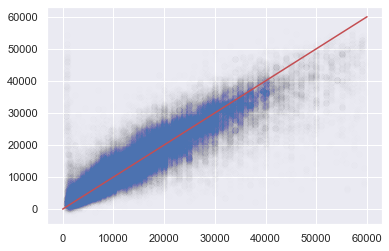

In [76]:
plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0,60000], [0,60000], 'r-')

- 실제로 값이 엄청 저렴한데 높게 책정하는 경우가 있고 전체적으로 underestimate 하는 경향이 있다.

(-100, 100)

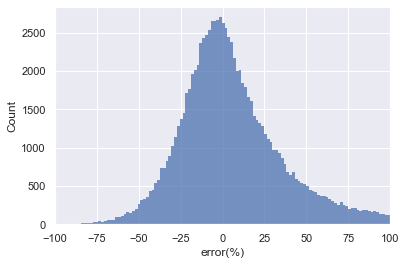

In [77]:
err = (pred - y_test) / y_test * 100
sns.histplot(err)
plt.xlabel('error(%)')
plt.xlim(-100, 100)

# 오차율에 관한 히스토그램

- 위 결론과 마찬가지로 underestimate 되는 경향이 주로 보이고, overestimate되는 값은 오차율이 크다.

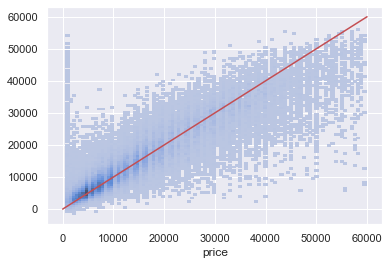

In [79]:
sns.histplot(x=y_test, y=pred)
plt.plot([0,60000], [0,60000], 'r-')